#Task 1

In [ ]:
from typing import List, Any

import pandas as pd
import numpy as np
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df_data = pd.read_csv(f'Keyword_data - Keyword_data.csv')
df_data.drop(columns=df_data.columns[0], axis=1, inplace=True)
df_data

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
1,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
2,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
3,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
4,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
5,When “The Show Must Go On”: Surface Acting and...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
6,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
7,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
8,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


List of words in rows

In [ ]:

lists = []

for i in range(0,len(df_data)):
    temp_list = list(df_data.iloc[i, 1:])
    temp_list = [x for x in temp_list if str(x) != "nan"]
    lists.append(temp_list)
print(lists)

List of unique words

In [ ]:
"""Unique Words"""
words=[]
for entry in lists:
    for record in entry:
        if record not in words:
            if record!='nan':
                words.append(record)
# words.pop(11)
print(len(words))

248


Mapping unique words into a dictionary

In [ ]:
dictio={}
for i in range(len(words)):
    dictio[words[i]]=i
dictio

In [ ]:
tempo_lists =[]
for entry in lists:
    temp =[]
    for record in entry:
        if record in dictio.keys():
            temp.append(dictio[record])
    tempo_lists.append(temp)

In [ ]:
print(tempo_lists)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 8, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 10, 27, 28], [29, 30, 31, 32, 33, 17, 34, 35, 36, 10], [25, 37, 38, 39, 40, 17, 41, 42, 10, 43, 9, 44], [45, 46, 47, 48, 49, 50, 51, 52, 53, 54], [55, 56, 57, 58, 59, 60, 9, 61, 8, 43, 62], [60, 17, 63, 1, 64, 65, 9, 66, 67, 5], [43, 68, 69, 70, 71], [10, 69, 72, 73, 30, 70, 66, 9, 74, 8], [68, 72, 75, 76, 77, 10, 16, 36, 7, 9, 8], [78, 79, 80, 7, 9, 66, 81, 10, 43, 82, 60], [73, 11, 12, 83, 82, 84, 85, 86, 87, 16, 88, 89], [41, 23, 90, 77, 7, 1, 66, 91], [78, 92, 29, 93, 94, 95, 10, 41, 9, 66], [90, 2, 96, 97, 98, 99, 8, 66, 10], [100, 101, 92, 102, 29, 103, 66, 8, 43, 104], [17, 43, 105, 106, 107, 108, 109, 110, 9, 111], [20, 112, 9, 8, 21, 66, 113, 114, 115], [116, 117, 49, 118, 119, 60, 17, 120, 121, 50, 122, 123], [92, 124, 125, 126, 17, 127, 16, 18, 36, 128, 65], [129, 53, 130, 131, 132, 33, 17, 133, 134, 128, 9, 8], [33, 124, 17, 20, 135, 136, 127, 137, 1, 113, 26], [19, 70

# Graph Building

In [ ]:
G = nx.Graph()

In [ ]:
""" Adding Nodes"""
for  entry in tempo_lists:
    G.add_nodes_from(entry)
print(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
""" Adding Edges"""
for record in tempo_lists:
    for n in record:
        for j in record:
            if j!=n:
                G.add_edge(n, j)

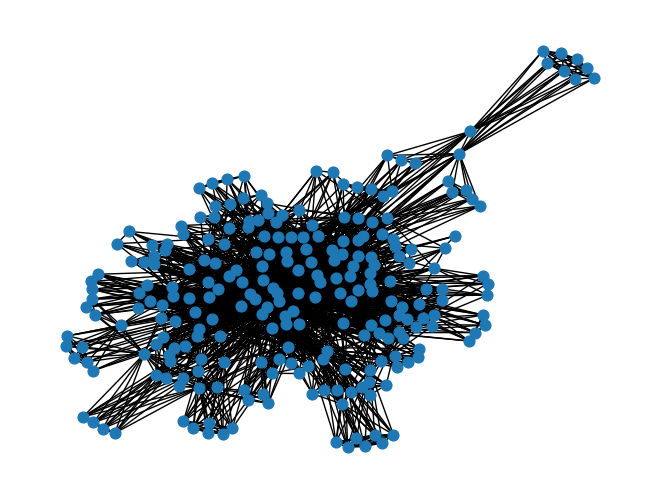

In [ ]:
nx.draw(G,node_size=60,font_size=8)
plt.show()

## Adjacency Matrix part 1

In [ ]:
adjacency_dataframe = pd.DataFrame(np.zeros((248, 248)))
list_of_edges = list(G.edges)
adjacency_dataframe

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data analysis DataFrame

## Weights

In [ ]:
ids_with_weights ={}
for num in list(G.nodes()):
    weight = 0
    for entry in tempo_lists:
        if num in entry:
            weight+=len(entry)-1
    ids_with_weights[num]=weight
print(ids_with_weights)

{0: 10, 1: 96, 2: 29, 3: 10, 4: 10, 5: 28, 6: 21, 7: 48, 8: 144, 9: 265, 10: 85, 11: 20, 12: 31, 13: 9, 14: 9, 15: 9, 16: 80, 17: 136, 18: 19, 19: 28, 20: 27, 21: 17, 22: 9, 23: 25, 24: 9, 25: 20, 26: 19, 27: 30, 28: 20, 29: 36, 30: 18, 31: 18, 32: 18, 33: 126, 34: 9, 35: 20, 36: 57, 37: 11, 38: 11, 39: 11, 40: 11, 41: 47, 42: 11, 43: 112, 44: 11, 45: 9, 46: 36, 47: 9, 48: 9, 49: 31, 50: 38, 51: 20, 52: 20, 53: 20, 54: 9, 55: 10, 56: 10, 57: 10, 58: 10, 59: 17, 60: 59, 61: 10, 62: 10, 63: 9, 64: 9, 65: 60, 66: 107, 67: 9, 68: 14, 69: 84, 70: 32, 71: 4, 72: 19, 73: 20, 74: 29, 75: 10, 76: 30, 77: 35, 78: 19, 79: 10, 80: 10, 81: 10, 82: 21, 83: 11, 84: 11, 85: 11, 86: 11, 87: 11, 88: 11, 89: 11, 90: 15, 91: 7, 92: 37, 93: 9, 94: 18, 95: 9, 96: 17, 97: 8, 98: 8, 99: 8, 100: 18, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 16, 107: 26, 108: 9, 109: 9, 110: 9, 111: 19, 112: 19, 113: 29, 114: 8, 115: 8, 116: 20, 117: 11, 118: 11, 119: 31, 120: 11, 121: 11, 122: 11, 123: 11, 124: 20, 125: 10,

In [ ]:
df = pd.DataFrame(list(ids_with_weights.items()))
df.drop(columns=df.columns[0], axis=1, inplace=True)
df =df.rename(columns = {0:"IDs",1:'Weight'})

Weight DF

In [ ]:
nodePairsWeight = {}
for entry in list_of_edges:
    sum=ids_with_weights[entry[0]]+ids_with_weights[entry[1]]
    adjacency_dataframe[entry[0]][entry[1]] =sum
    adjacency_dataframe[entry[1]][entry[0]] = sum
    nodePairsWeight[entry]=sum
adjacency_dataframe

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,0.0,106.0,39.0,20.0,20.0,38.0,31.0,58.0,154.0,275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,106.0,0.0,125.0,106.0,106.0,124.0,117.0,144.0,240.0,361.0,...,0.0,0.0,107.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.0,125.0,0.0,39.0,39.0,57.0,50.0,77.0,173.0,294.0,...,0.0,0.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,106.0,39.0,0.0,20.0,38.0,31.0,58.0,154.0,275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,106.0,39.0,20.0,0.0,38.0,31.0,58.0,154.0,275.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,...,0.0,0.0,0.0,0.0,22.0,0.0,22.0,22.0,22.0,22.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,...,0.0,0.0,0.0,0.0,22.0,22.0,0.0,22.0,22.0,22.0
245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,...,0.0,0.0,0.0,0.0,22.0,22.0,22.0,0.0,22.0,22.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,...,0.0,0.0,0.0,0.0,22.0,22.0,22.0,22.0,0.0,22.0


## Adjacency Matrix part 2

In [ ]:
adj = adjacency_dataframe.T @ adjacency_dataframe
np.fill_diagonal(adj.values, 0)
adj

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,0.0,179236.0,141314.0,127292.0,127292.0,140612.0,135586.0,153892.0,195364.0,195122.0,...,100762.0,100762.0,112672.0,112672.0,75900.0,75900.0,75900.0,75900.0,75900.0,75900.0
1,179236.0,0.0,328226.0,179236.0,179236.0,373226.0,256712.0,417510.0,1091735.0,2111716.0,...,197630.0,197630.0,236060.0,236060.0,116736.0,116736.0,116736.0,116736.0,116736.0,116736.0
2,141314.0,328226.0,0.0,141314.0,141314.0,199258.0,179924.0,223790.0,410248.0,491287.0,...,136042.0,136042.0,180450.0,180450.0,81144.0,81144.0,81144.0,81144.0,81144.0,81144.0
3,127292.0,179236.0,141314.0,0.0,127292.0,140612.0,135586.0,153892.0,195364.0,195122.0,...,100762.0,100762.0,112672.0,112672.0,75900.0,75900.0,75900.0,75900.0,75900.0,75900.0
4,127292.0,179236.0,141314.0,127292.0,0.0,140612.0,135586.0,153892.0,195364.0,195122.0,...,100762.0,100762.0,112672.0,112672.0,75900.0,75900.0,75900.0,75900.0,75900.0,75900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,75900.0,116736.0,81144.0,75900.0,75900.0,91508.0,88911.0,117716.0,186416.0,158951.0,...,85201.0,85201.0,76176.0,76176.0,112469.0,0.0,112469.0,112469.0,112469.0,112469.0
244,75900.0,116736.0,81144.0,75900.0,75900.0,91508.0,88911.0,117716.0,186416.0,158951.0,...,85201.0,85201.0,76176.0,76176.0,112469.0,112469.0,0.0,112469.0,112469.0,112469.0
245,75900.0,116736.0,81144.0,75900.0,75900.0,91508.0,88911.0,117716.0,186416.0,158951.0,...,85201.0,85201.0,76176.0,76176.0,112469.0,112469.0,112469.0,0.0,112469.0,112469.0
246,75900.0,116736.0,81144.0,75900.0,75900.0,91508.0,88911.0,117716.0,186416.0,158951.0,...,85201.0,85201.0,76176.0,76176.0,112469.0,112469.0,112469.0,112469.0,0.0,112469.0


## Frequency

In [ ]:
ids_with_frequency ={}
for num in list(G.nodes()):
    count = 0
    for entry in tempo_lists:
        if num in entry:
            count+=1
    ids_with_frequency[num]=count
print(ids_with_frequency)

{0: 1, 1: 10, 2: 3, 3: 1, 4: 1, 5: 3, 6: 2, 7: 5, 8: 15, 9: 27, 10: 9, 11: 2, 12: 3, 13: 1, 14: 1, 15: 1, 16: 8, 17: 14, 18: 2, 19: 3, 20: 3, 21: 2, 22: 1, 23: 3, 24: 1, 25: 2, 26: 2, 27: 3, 28: 2, 29: 4, 30: 2, 31: 2, 32: 2, 33: 13, 34: 1, 35: 2, 36: 6, 37: 1, 38: 1, 39: 1, 40: 1, 41: 5, 42: 1, 43: 12, 44: 1, 45: 1, 46: 4, 47: 1, 48: 1, 49: 3, 50: 4, 51: 2, 52: 2, 53: 2, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 2, 60: 6, 61: 1, 62: 1, 63: 1, 64: 1, 65: 6, 66: 12, 67: 1, 68: 2, 69: 9, 70: 4, 71: 1, 72: 2, 73: 2, 74: 3, 75: 1, 76: 3, 77: 4, 78: 2, 79: 1, 80: 1, 81: 1, 82: 2, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 2, 91: 1, 92: 4, 93: 1, 94: 2, 95: 1, 96: 2, 97: 1, 98: 1, 99: 1, 100: 2, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 2, 107: 3, 108: 1, 109: 1, 110: 1, 111: 2, 112: 2, 113: 3, 114: 1, 115: 1, 116: 2, 117: 1, 118: 1, 119: 3, 120: 1, 121: 1, 122: 1, 123: 1, 124: 2, 125: 1, 126: 2, 127: 3, 128: 2, 129: 1, 130: 5, 131: 1, 132: 2, 133: 2, 134: 2, 135: 1, 136: 8, 137: 1

In [ ]:
df['Frequency']= ids_with_frequency.values()

## Node Degree

In [ ]:
degrees = [val for (node, val) in G.degree()]
print(degrees)

[10, 66, 23, 10, 10, 24, 19, 38, 104, 166, 62, 18, 29, 9, 9, 9, 66, 102, 17, 24, 24, 16, 9, 25, 9, 19, 18, 27, 20, 31, 17, 17, 17, 93, 9, 19, 46, 11, 11, 11, 11, 42, 11, 90, 11, 9, 32, 9, 9, 29, 31, 19, 19, 20, 9, 10, 10, 10, 10, 17, 49, 10, 10, 9, 9, 48, 74, 9, 14, 64, 26, 4, 16, 20, 25, 10, 28, 32, 16, 10, 10, 10, 21, 11, 11, 11, 11, 11, 11, 11, 14, 7, 32, 9, 17, 9, 17, 8, 8, 8, 16, 9, 9, 9, 9, 9, 15, 23, 9, 9, 9, 17, 17, 27, 8, 8, 18, 11, 11, 26, 11, 11, 11, 11, 18, 10, 18, 27, 20, 11, 37, 11, 21, 18, 20, 10, 55, 10, 10, 18, 17, 10, 10, 9, 9, 9, 26, 37, 9, 9, 26, 9, 16, 17, 18, 9, 9, 9, 9, 9, 31, 9, 9, 9, 9, 10, 10, 41, 10, 10, 9, 9, 9, 9, 9, 18, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 17, 9, 9, 35, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 18, 7, 9, 9, 17, 9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 10, 11, 11, 11, 11, 11, 21, 11, 11, 11, 11, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [ ]:
df['Node Degree']= degrees

Strength

In [ ]:
strengths = {}
for num in list(G.nodes()):
    strength = 0
    for entry in tempo_lists:
        if num in entry:
            for i in entry:
                if i!= num:
                    strength+=ids_with_weights[i]

    strengths[num]=strength
strengths

{0: 736,
 1: 5682,
 2: 2072,
 3: 736,
 4: 736,
 5: 2097,
 6: 1503,
 7: 3073,
 8: 7892,
 9: 11601,
 10: 4885,
 11: 694,
 12: 1262,
 13: 476,
 14: 476,
 15: 476,
 16: 3509,
 17: 6373,
 18: 937,
 19: 1332,
 20: 1386,
 21: 851,
 22: 252,
 23: 880,
 24: 252,
 25: 952,
 26: 805,
 27: 1906,
 28: 822,
 29: 1804,
 30: 1290,
 31: 1024,
 32: 1024,
 33: 6571,
 34: 514,
 35: 1282,
 36: 3033,
 37: 720,
 38: 720,
 39: 720,
 40: 720,
 41: 2483,
 42: 720,
 43: 5320,
 44: 720,
 45: 192,
 46: 1588,
 47: 192,
 48: 192,
 49: 1337,
 50: 1691,
 51: 808,
 52: 808,
 53: 1007,
 54: 192,
 55: 647,
 56: 647,
 57: 647,
 58: 647,
 59: 884,
 60: 3508,
 61: 647,
 62: 647,
 63: 769,
 64: 769,
 65: 3685,
 66: 6546,
 67: 769,
 68: 1005,
 69: 4577,
 70: 1852,
 71: 242,
 72: 1552,
 73: 1012,
 74: 2036,
 75: 777,
 76: 1621,
 77: 1869,
 78: 1340,
 79: 736,
 80: 736,
 81: 736,
 82: 953,
 83: 238,
 84: 238,
 85: 238,
 86: 238,
 87: 238,
 88: 238,
 89: 238,
 90: 771,
 91: 373,
 92: 2001,
 93: 623,
 94: 1253,
 95: 623,
 96: 994

In [ ]:
df['Strength']= strengths

## Result

In [ ]:
df["Keyword"] = dictio.keys()

In [ ]:
columns_titles = ["Keyword","Frequency","Node Degree","Weight","Strength"]
df=df.reindex(columns=columns_titles)

In [ ]:
df

,Keyword,Frequency,Node Degree,Weight,Strength
0,EQUITY,1,10,10,736
1,ORGANIZATIONAL sociology,10,66,96,5682
2,PERFORMANCE,3,23,29,2072
3,META-analysis,1,10,10,736
4,PSYCHOMETRICS,1,10,10,736
...,...,...,...,...,...
243,CUSTOMER relations,1,11,11,636
244,PRODUCTION management,1,11,11,636
245,LABOR process,1,11,11,636
246,CUSTOMER orientation,1,11,11,636


Top 10 nodes by degree

In [ ]:
df.sort_values(by="Node Degree", ascending=False).head(10)

,Keyword,Frequency,Node Degree,Weight,Strength
9,ORGANIZATIONAL behavior,27,166,265,11601
8,ORGANIZATIONAL effectiveness,15,104,144,7892
17,MANAGEMENT science,14,102,136,6373
33,PERSONNEL management,13,93,126,6571
43,DECISION making,12,90,112,5320
66,ORGANIZATIONAL structure,12,74,107,6546
16,STRATEGIC planning,8,66,80,3509
1,ORGANIZATIONAL sociology,10,66,96,5682
69,INDUSTRIAL management,9,64,84,4577
10,CORPORATE governance,9,62,85,4885


Top 10 nodes by strength

In [ ]:
df.sort_values(by="Strength", ascending=False).head(10)

,Keyword,Frequency,Node Degree,Weight,Strength
9,ORGANIZATIONAL behavior,27,166,265,11601
8,ORGANIZATIONAL effectiveness,15,104,144,7892
33,PERSONNEL management,13,93,126,6571
66,ORGANIZATIONAL structure,12,74,107,6546
17,MANAGEMENT science,14,102,136,6373
1,ORGANIZATIONAL sociology,10,66,96,5682
43,DECISION making,12,90,112,5320
10,CORPORATE governance,9,62,85,4885
136,TEAMS in the workplace,8,55,78,4648
69,INDUSTRIAL management,9,64,84,4577


Top 10 node pairs by weight

In [ ]:
value_key_pairs = ((value, key) for (key,value) in nodePairsWeight.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)

for i in range(10):
    print(f"{i+1} : {sorted_value_key_pairs[i]}")


1 : (409, (8, 9))
2 : (401, (9, 17))
3 : (391, (9, 33))
4 : (377, (9, 43))
5 : (372, (9, 66))
6 : (361, (1, 9))
7 : (350, (9, 10))
8 : (349, (9, 69))
9 : (345, (9, 16))
10 : (343, (9, 136))


# Plotting

In [ ]:
def plotting(dataf):
    fig = plt.figure(plt.figure(figsize=(6,6)))
    twodee = fig.add_subplot()
    twodee.scatter(dataf['Node Degree'],dataf['Strength'])
    plt.xlabel("Degree")
    plt.ylabel("Strength")
    plt.show()

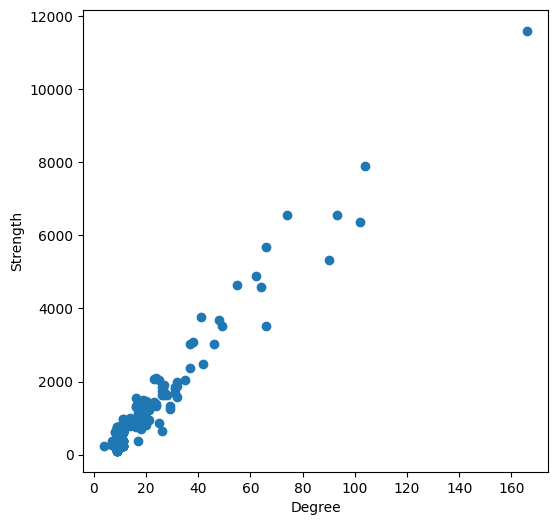

In [ ]:
    plotting(df)

# Task 2

In [ ]:
# !pip install --upgrade pip

### 2017

In [ ]:
df_2017 = pd.read_csv("2017.csv")
df_2017.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,8550,9.460000e+17,9.460000e+17,1.510000e+12,27-12-2017 00:32,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN
1,8551,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 20:14,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN
2,8552,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 20:10,0,NaN,@dd_hogan Ok,und,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN
3,8553,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 18:57,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN
4,8554,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 18:55,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN


In [ ]:
df_2017['tweet'] = df_2017['tweet'].str.lower()
df_2017['tweet'] = df_2017['tweet'].str.replace('@\\w+','').str.replace('(f|ht)tp\\S+\\s*','').str.replace('[[:punct:]]','').str.strip(' \t\n\r')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df_2017['Stopwords'] = df_2017['tweet'].apply(lambda x:','.join([word for word in x.split() if word in stopwords]))
df_2017['tweet_no_stop_word'] = df_2017['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df_2017['tweet_no_stop_word'] = df_2017['tweet_no_stop_word'].apply(remove_punctuations)
df_2017.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Stopwords,tweet_no_stop_word
0,8550,9.460000e+17,9.460000e+17,1.510000e+12,27-12-2017 00:32,0,NaN,coming very soon,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN,very,coming soon
1,8551,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 20:14,0,NaN,vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN,,vastly better mapsnav coming soon
2,8552,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 20:10,0,NaN,ok,und,[],...,NaN,NaN,NaN,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN,,ok
3,8553,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 18:57,0,NaN,sure,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN,,sure
4,8554,9.460000e+17,9.460000e+17,1.510000e+12,26-12-2017 18:55,0,NaN,"yeah, it’s terrible. had to upgrade old linux ...",en,[],...,NaN,NaN,NaN,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN,"had,to,and,a,of,to,all,in,a,few,will,be,at,unt...",yeah it’s terrible upgrade old linux os bunch ...


In [ ]:
word_frequency = df_2017.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})

In [ ]:
Top10 = df_2017.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().head(10).rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
Top10

,word,Frequency
0,amp,86
1,tesla,71
2,model,59
3,yes,54
4,good,53
5,like,49
6,one,46
7,first,42
8,next,41
9,3,40


Text(0, 0.5, 'word count')

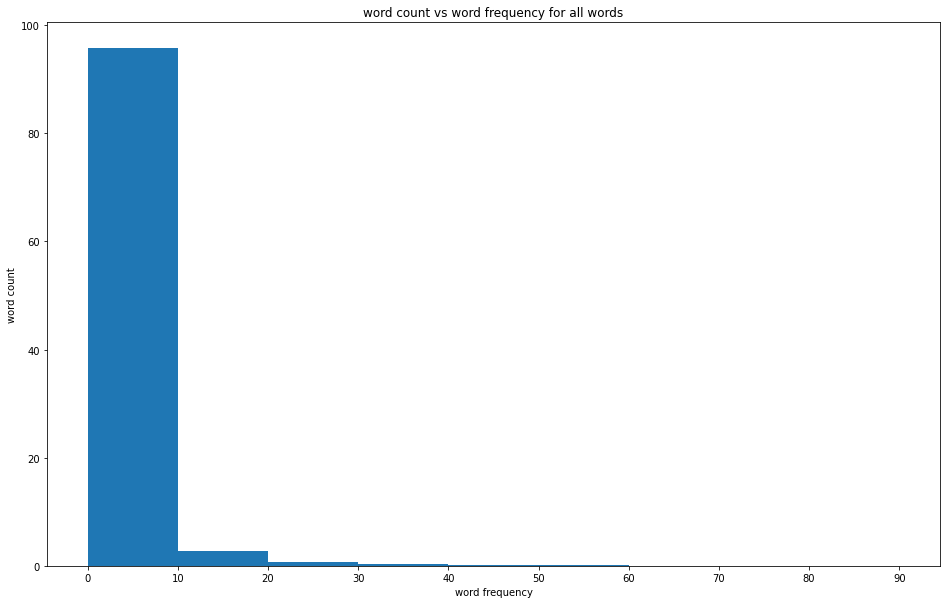

In [ ]:
figure = plt.figure(figsize=(16,10))
plt.hist(word_frequency.Frequency,weights = np.ones_like(word_frequency.Frequency)*100/len(word_frequency),bins = range(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.title('word count vs word frequency for all words')
plt.xlabel('word frequency')
plt.ylabel('word count')

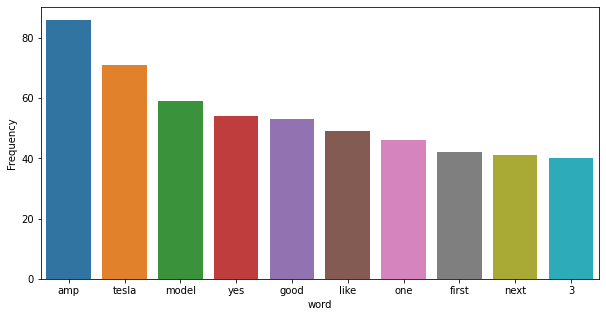

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='word',y='Frequency',data=Top10);

In [ ]:
from nltk import FreqDist
fd=FreqDist()

In [ ]:
corpus = df_2017.tweet_no_stop_word.str.split(expand=True).stack()
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

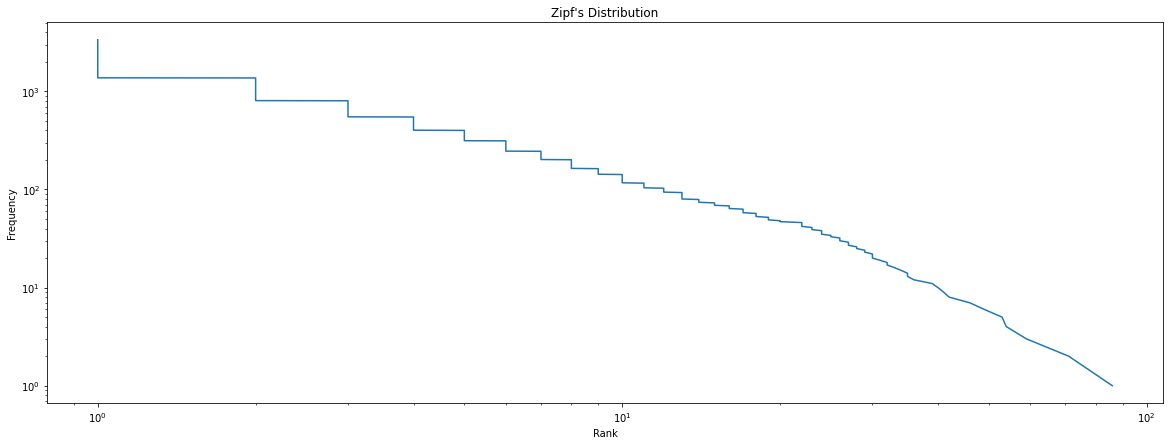

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
# text = [[word for word in line.split()] for line in df['tweet_no_stop_word']]
bigrams = list(nltk.bigrams(df_2017.tweet_no_stop_word.str.split(expand=True).stack()))
print(bigrams)

In [ ]:
!pip uninstall networkx -y
!pip install networkx==2.4

Found existing installation: networkx 2.4
Uninstalling networkx-2.4:
  Successfully uninstalled networkx-2.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)


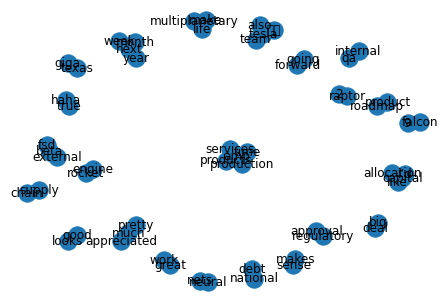

In [ ]:
import networkx as nx
bigram_df = pd.DataFrame(bigrams, columns = ['w1','w2'])
bigram_df['count'] = 1
bigram_df = bigram_df.groupby(['w1','w2'],as_index=False).sum()
bigram_df = bigram_df[bigram_df['count']>=3]
g = nx.from_pandas_edgelist(bigram_df,source = 'w1',target = 'w2')
nx.draw(g,with_labels = True)

### 2018

In [ ]:
df_2018 = pd.read_csv("2018.csv")
df_2018.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,6262,1.080000e+18,1.080000e+18,1.550000e+12,31-12-2018 19:20,0,NaN,Hope everyone has a happy New Year!,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,6263,1.080000e+18,1.080000e+18,1.550000e+12,31-12-2018 19:20,0,NaN,@DMC_Ryan Happy New Year!,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DMC_Ryan', 'name': 'Ryan McC...",NaN,NaN,NaN,NaN
2,6264,1.080000e+18,1.080000e+18,1.550000e+12,31-12-2018 02:27,0,NaN,Good summary of Tesla progress in 2018 by @cle...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,6265,1.080000e+18,1.080000e+18,1.550000e+12,30-12-2018 20:08,0,NaN,@Ben757677 @vincent13031925 Thanks Tesla owner...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
4,6266,1.080000e+18,1.080000e+18,1.550000e+12,30-12-2018 19:27,0,NaN,"@Grimezsz Turns out if you take Dayquil, you e...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Grimezsz', 'name': '☘︎𝔊𝔯𝔦𝔪𝔢𝔰...",NaN,NaN,NaN,NaN


In [ ]:
df_2018['tweet'] = df_2018['tweet'].str.lower()
df_2018['tweet'] = df_2018['tweet'].str.replace('@\\w+','').str.replace('(f|ht)tp\\S+\\s*','').str.replace('[[:punct:]]','').str.strip(' \t\n\r')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df_2018['Stopwords'] = df_2018['tweet'].apply(lambda x:','.join([word for word in x.split() if word in stopwords]))
df_2018['tweet_no_stop_word'] = df_2018['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df_2018['tweet_no_stop_word'] = df_2018['tweet_no_stop_word'].apply(remove_punctuations)
df_2018.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Stopwords,tweet_no_stop_word
0,6262,1.080000e+18,1.080000e+18,1.550000e+12,31-12-2018 19:20,0,NaN,hope everyone has a happy new year!,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"has,a",hope everyone happy new year
1,6263,1.080000e+18,1.080000e+18,1.550000e+12,31-12-2018 19:20,0,NaN,happy new year!,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'DMC_Ryan', 'name': 'Ryan McC...",NaN,NaN,NaN,NaN,,happy new year
2,6264,1.080000e+18,1.080000e+18,1.550000e+12,31-12-2018 02:27,0,NaN,good summary of tesla progress in 2018 by (du...,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"of,in,by,to,not,me",good summary tesla progress 2018 due tesla tea...
3,6265,1.080000e+18,1.080000e+18,1.550000e+12,30-12-2018 20:08,0,NaN,thanks tesla owners in china! looking forward ...,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN,"in,to,for,the,of",thanks tesla owners china looking forward visi...
4,6266,1.080000e+18,1.080000e+18,1.550000e+12,30-12-2018 19:27,0,NaN,"turns out if you take dayquil, you exit the ma...",en,[],...,NaN,NaN,NaN,"[{'screen_name': 'Grimezsz', 'name': '☘︎𝔊𝔯𝔦𝔪𝔢𝔰...",NaN,NaN,NaN,NaN,"out,if,you,you,the",turns take dayquil exit matrix


In [ ]:
word_frequency = df_2018.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
word_frequency

,word,Frequency
0,amp,523
1,tesla,286
2,car,118
3,yes,107
4,3,102
...,...,...
5848,std,1
5849,extensive,1
5850,demonstrate,1
5851,provincial,1


In [ ]:
Top10 = df_2018.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().head(10).rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
Top10

,word,Frequency
0,amp,523
1,tesla,286
2,car,118
3,yes,107
4,3,102
5,good,101
6,model,98
7,it’s,95
8,like,93
9,…,86


Text(0, 0.5, 'word count')

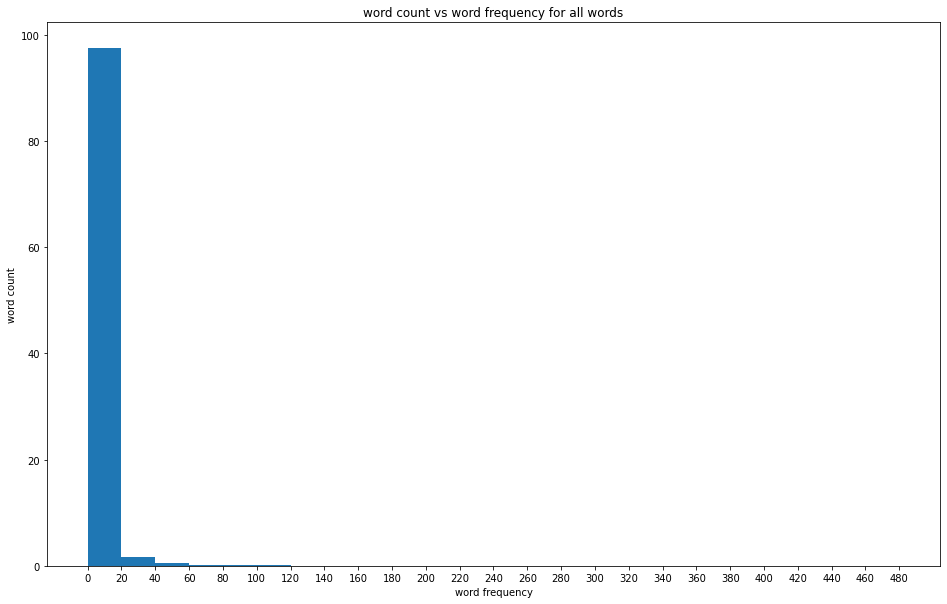

In [ ]:
figure = plt.figure(figsize=(16,10))
plt.hist(word_frequency.Frequency,weights = np.ones_like(word_frequency.Frequency)*100/len(word_frequency),bins = range(0,500,20))
plt.xticks(np.arange(0,500,20))
plt.title('word count vs word frequency for all words')
plt.xlabel('word frequency')
plt.ylabel('word count')

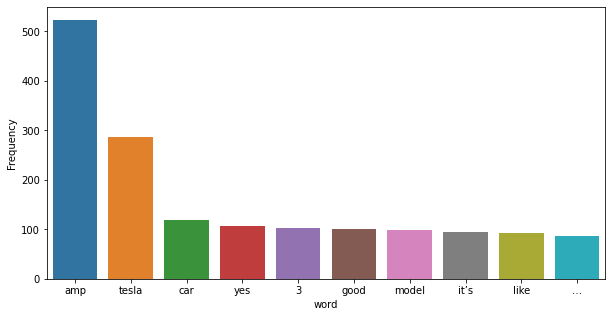

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='word',y='Frequency',data=Top10);

In [ ]:
from nltk import FreqDist
fd=FreqDist()

In [ ]:
corpus = df_2018.tweet_no_stop_word.str.split(expand=True).stack()
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

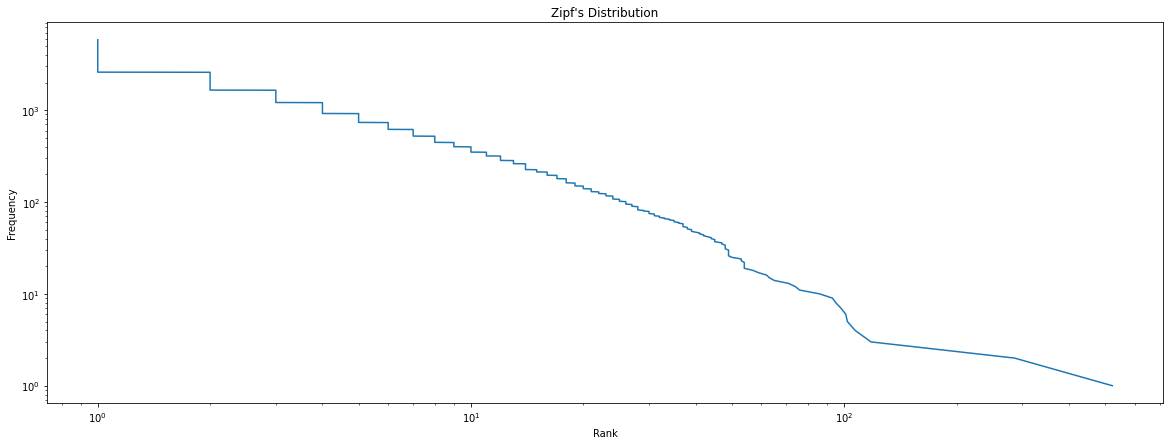

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
# text = [[word for word in line.split()] for line in df['tweet_no_stop_word']]
bigrams = list(nltk.bigrams(df_2018.tweet_no_stop_word.str.split(expand=True).stack()))
print (bigrams)

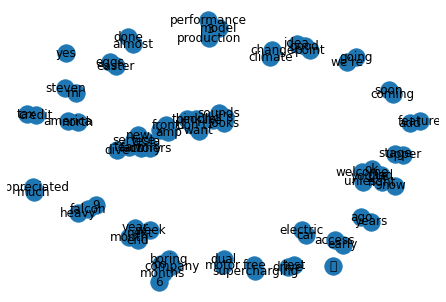

In [ ]:
import networkx as nx
bigram_df = pd.DataFrame(bigrams, columns = ['w1','w2'])
bigram_df['count'] = 1
bigram_df = bigram_df.groupby(['w1','w2'],as_index=False).sum()
bigram_df = bigram_df[bigram_df['count']>=5]
g = nx.from_pandas_edgelist(bigram_df,source = 'w1',target = 'w2')
nx.draw(g,with_labels = True)

#2019

In [ ]:
#for 2019

In [ ]:
df_2019 = pd.read_csv("2019.csv")
df_2019.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,3330,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 21:37,0,NaN,@engineers_feed @physicsJ It’s a bit slow,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'engineers_feed', 'name': 'Wo...",NaN,NaN,NaN,NaN
1,3331,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 06:59,0,NaN,@JohnnaCrider1 It’s not ready yet,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JohnnaCrider1', 'name': 'Joh...",NaN,NaN,NaN,NaN
2,3332,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 06:57,0,NaN,@newscientist Explains 🐈 🎥,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'newscientist', 'name': 'New ...",NaN,NaN,NaN,NaN
3,3333,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 02:27,0,NaN,@teslaownersSV @rhoehn Thanks all Tesla club m...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",NaN,NaN,NaN,NaN
4,3334,1.210000e+18,1.210000e+18,1.580000e+12,30-12-2019 23:27,0,NaN,Rest in peace Syd Mead. Your art will endure.,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df_2019['tweet'] = df_2019['tweet'].str.lower()
df_2019['tweet'] = df_2019['tweet'].str.replace('@\\w+','').str.replace('(f|ht)tp\\S+\\s*','').str.replace('[[:punct:]]','').str.strip(' \t\n\r')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df_2019['Stopwords'] = df_2019['tweet'].apply(lambda x:','.join([word for word in x.split() if word in stopwords]))
df_2019['tweet_no_stop_word'] = df_2019['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


In [ ]:
df_2019['tweet_no_stop_word'] = df_2019['tweet_no_stop_word'].apply(remove_punctuations)
df_2019.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Stopwords,tweet_no_stop_word
0,3330,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 21:37,0,NaN,it’s a bit slow,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'engineers_feed', 'name': 'Wo...",NaN,NaN,NaN,NaN,a,it’s bit slow
1,3331,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 06:59,0,NaN,it’s not ready yet,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'JohnnaCrider1', 'name': 'Joh...",NaN,NaN,NaN,NaN,not,it’s ready yet
2,3332,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 06:57,0,NaN,explains 🐈 🎥,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'newscientist', 'name': 'New ...",NaN,NaN,NaN,NaN,,explains 🐈 🎥
3,3333,1.210000e+18,1.210000e+18,1.580000e+12,31-12-2019 02:27,0,NaN,thanks all tesla club members for helping out!...,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",NaN,NaN,NaN,NaN,"all,for,to,you,there",thanks tesla club members helping out looking ...
4,3334,1.210000e+18,1.210000e+18,1.580000e+12,30-12-2019 23:27,0,NaN,rest in peace syd mead. your art will endure.,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"in,your,will",rest peace syd mead art endure


In [ ]:
word_frequency = df_2019.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
word_frequency

,word,Frequency
0,amp,493
1,tesla,249
2,yes,154
3,it’s,119
4,would,98
...,...,...
5588,fiction,1
5589,matches,1
5590,softwarehardware,1
5591,addressing,1


In [ ]:
Top10 = df_2019.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().head(10).rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
Top10

,word,Frequency
0,amp,493
1,tesla,249
2,yes,154
3,it’s,119
4,would,98
5,great,97
6,starship,89
7,…,89
8,like,87
9,good,85


Text(0, 0.5, 'word count')

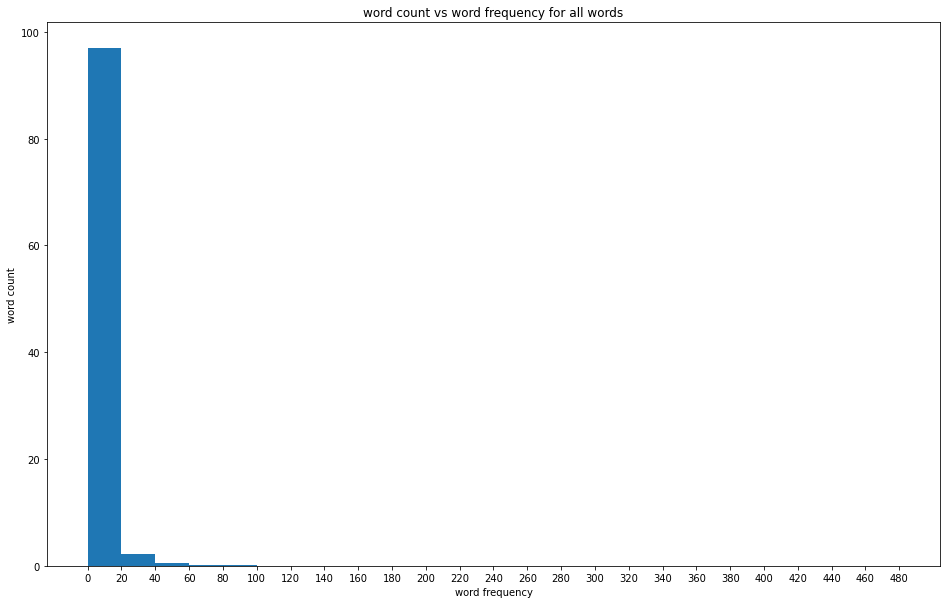

In [ ]:
figure = plt.figure(figsize=(16,10))
plt.hist(word_frequency.Frequency,weights = np.ones_like(word_frequency.Frequency)*100/len(word_frequency),bins = range(0,500,20))
plt.xticks(np.arange(0,500,20))
plt.title('word count vs word frequency for all words')
plt.xlabel('word frequency')
plt.ylabel('word count')

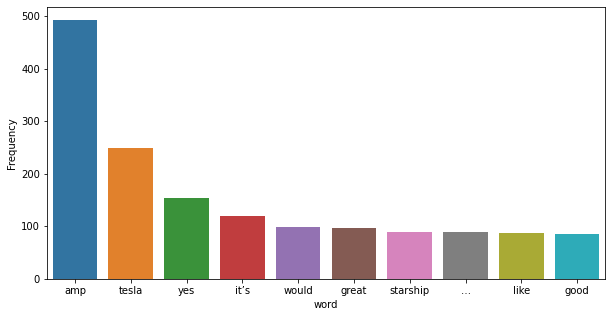

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='word',y='Frequency',data=Top10);

In [ ]:
from nltk import FreqDist
fd=FreqDist()

In [ ]:
corpus = df_2019.tweet_no_stop_word.str.split(expand=True).stack()
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

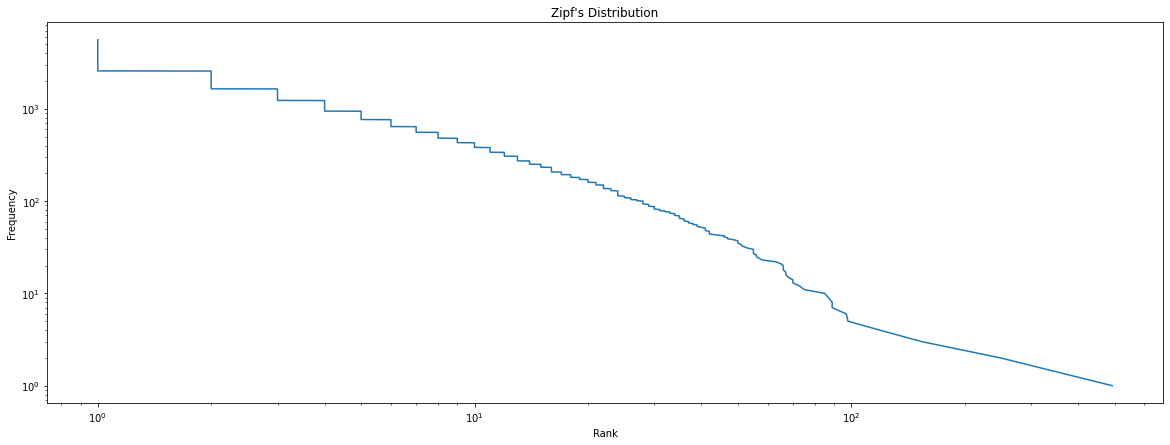

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
# text = [[word for word in line.split()] for line in df['tweet_no_stop_word']]
bigrams = list(nltk.bigrams(df_2019.tweet_no_stop_word.str.split(expand=True).stack()))
print (bigrams)

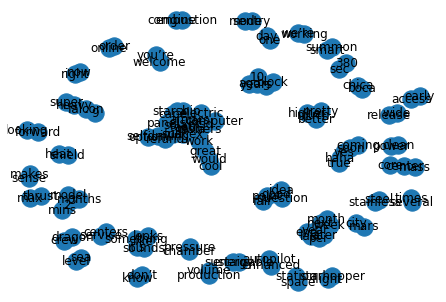

In [ ]:
import networkx as nx
bigram_df = pd.DataFrame(bigrams, columns = ['w1','w2'])
bigram_df['count'] = 1
bigram_df = bigram_df.groupby(['w1','w2'],as_index=False).sum()
bigram_df = bigram_df[bigram_df['count']>=5]
g = nx.from_pandas_edgelist(bigram_df,source = 'w1',target = 'w2')
nx.draw(g,with_labels = True)

#2020

In [ ]:
#For 2020

In [ ]:
df_2020 = pd.read_csv("2020.csv")
df_2020.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 19:46,0.0,NaN,Entertainment will be critical when cars drive...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 18:07,0.0,NaN,@kimpaquette Just meeting with Larry Ellison t...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kimpaquette', 'name': 'Kim P...",NaN,NaN,NaN,NaN
2,2.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 17:23,0.0,NaN,@richierichhhhh_ Absolutely,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'richierichhhhh_', 'name': 'R...",NaN,NaN,NaN,NaN
3,3.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 17:23,0.0,NaN,What should Tesla do with in-car gaming in an ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 05:39,0.0,NaN,@PPathole @WSJ Absolutely,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN


In [ ]:
df_2020['tweet'] = df_2020['tweet'].str.lower()
df_2020['tweet'] = df_2020['tweet'].str.replace('@\\w+','').str.replace('(f|ht)tp\\S+\\s*','').str.replace('[[:punct:]]','').str.strip(' \t\n\r')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df_2020['tweet']=df_2020['tweet'].fillna("")

In [ ]:
df_2020['Stopwords'] = df_2020['tweet'].apply(lambda x:','.join([word for word in x.split() if word in stopwords]))
df_2020['tweet_no_stop_word'] = df_2020['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df_2020['tweet_no_stop_word'] = df_2020['tweet_no_stop_word'].apply(remove_punctuations)
df_2020.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Stopwords,tweet_no_stop_word
0,0.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 19:46,0.0,NaN,entertainment will be critical when cars drive...,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"will,be,when,themselves",entertainment critical cars drive
1,1.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 18:07,0.0,NaN,just meeting with larry ellison to seek some a...,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'kimpaquette', 'name': 'Kim P...",NaN,NaN,NaN,NaN,"just,with,to,some,on,of",meeting larry ellison seek advice back working...
2,2.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 17:23,0.0,NaN,absolutely,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'richierichhhhh_', 'name': 'R...",NaN,NaN,NaN,NaN,,absolutely
3,3.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 17:23,0.0,NaN,what should tesla do with in-car gaming in an ...,en,[],...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"what,should,do,with,in,an",tesla incar gaming autonomous world
4,4.0,1.340000e+18,1.340000e+18,1.610000e+12,28-12-2020 05:39,0.0,NaN,absolutely,en,[],...,NaN,NaN,NaN,"[{'screen_name': 'PPathole', 'name': 'Pranay P...",NaN,NaN,NaN,NaN,,absolutely


In [ ]:
word_frequency = df_2020.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
word_frequency

,word,Frequency
0,amp,575
1,tesla,188
2,yes,160
3,it’s,139
4,great,127
...,...,...
6187,löffel,1
6188,benutzen,1
6189,vr,1
6190,avatars,1


In [ ]:
Top10 = df_2020.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().head(10).rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
Top10

,word,Frequency
0,amp,575
1,tesla,188
2,yes,160
3,it’s,139
4,great,127
5,much,120
6,good,112
7,would,92
8,sure,88
9,🤣🤣,85


Text(0, 0.5, 'word count')

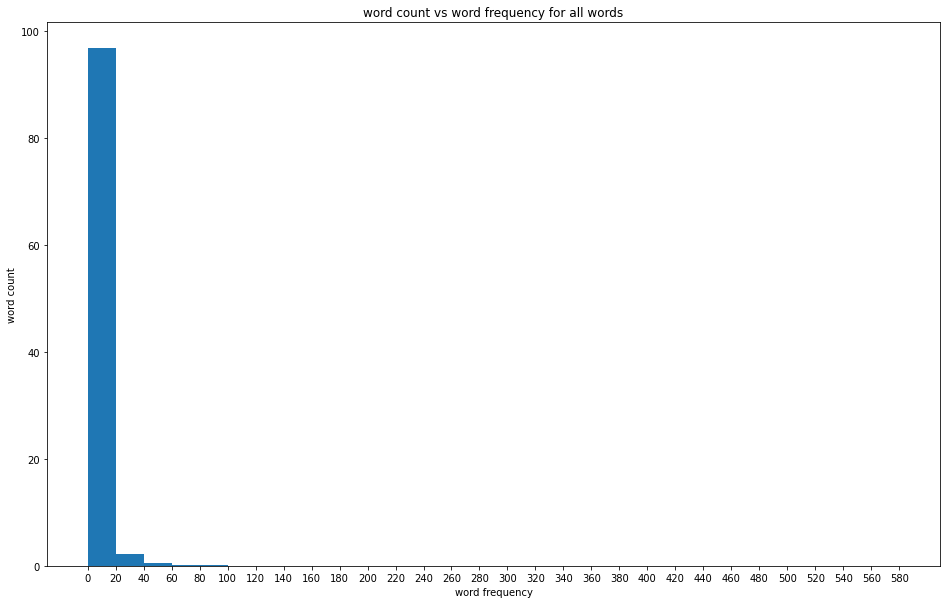

In [ ]:
figure = plt.figure(figsize=(16,10))
plt.hist(word_frequency.Frequency,weights = np.ones_like(word_frequency.Frequency)*100/len(word_frequency),bins = range(0,600,20))
plt.xticks(np.arange(0,600,20))
plt.title('word count vs word frequency for all words')
plt.xlabel('word frequency')
plt.ylabel('word count')

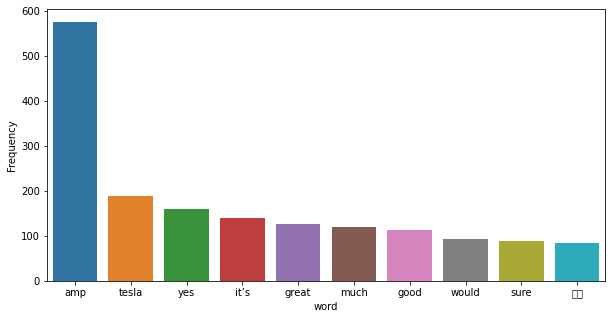

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='word',y='Frequency',data=Top10);

In [ ]:
from nltk import FreqDist
fd=FreqDist()

In [ ]:
corpus = df_2020.tweet_no_stop_word.str.split(expand=True).stack()
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

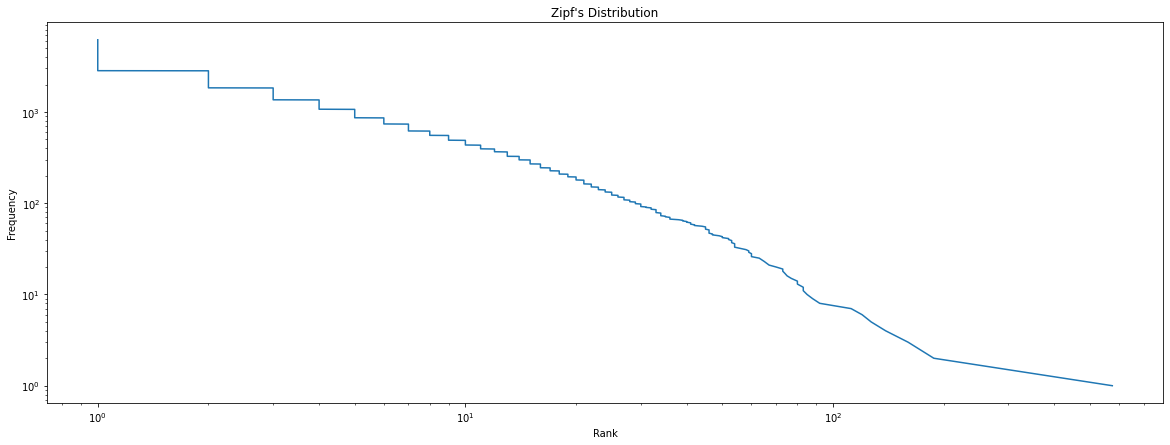

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
# text = [[word for word in line.split()] for line in df['tweet_no_stop_word']]
bigrams = list(nltk.bigrams(df_2020.tweet_no_stop_word.str.split(expand=True).stack()))
print (bigrams)

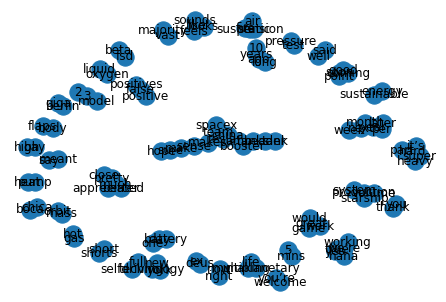

In [ ]:
import networkx as nx
bigram_df = pd.DataFrame(bigrams, columns = ['w1','w2'])
bigram_df['count'] = 1
bigram_df = bigram_df.groupby(['w1','w2'],as_index=False).sum()
bigram_df = bigram_df[bigram_df['count']>=5]
g = nx.from_pandas_edgelist(bigram_df,source = 'w1',target = 'w2')
nx.draw(g,with_labels = True)

#2021

In [ ]:
#For 2021

In [ ]:
df_2021 = pd.read_csv("2021.csv")
df_2021.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1476662222617251846,1476620230692679680,2021-12-31 01:11:23 Arabian Standard Time,2021-12-31,01:11:23,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'roshanpateI', 'name': 'Rosha...",NaN,NaN,NaN,NaN
1,1476656306610216960,1476644467578859528,2021-12-31 00:47:53 Arabian Standard Time,2021-12-31,00:47:53,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tesla_raj', 'name': 'Tesla R...",NaN,NaN,NaN,NaN
2,1476651519986614281,1476252898115964928,2021-12-31 00:28:51 Arabian Standard Time,2021-12-31,00:28:51,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CSmithson80', 'name': 'Chris...",NaN,NaN,NaN,NaN
3,1476619907076923398,1476252898115964928,2021-12-30 22:23:14 Arabian Standard Time,2021-12-30,22:23:14,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN
4,1476618021024190474,1476252898115964928,2021-12-30 22:15:45 Arabian Standard Time,2021-12-30,22:15:45,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mims', 'name': 'Christopher ...",NaN,NaN,NaN,NaN


In [ ]:
df_2021['tweet'] = df_2021['tweet'].str.lower()
df_2021['tweet'] = df_2021['tweet'].str.replace('@\\w+','').str.replace('(f|ht)tp\\S+\\s*','').str.replace('[[:punct:]]','').str.strip(' \t\n\r')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df_2021['Stopwords'] = df_2021['tweet'].apply(lambda x:','.join([word for word in x.split() if word in stopwords]))
df_2021['tweet_no_stop_word'] = df_2021['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df_2021['tweet_no_stop_word'] = df_2021['tweet_no_stop_word'].apply(remove_punctuations)
df_2021.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Stopwords,tweet_no_stop_word
0,1476662222617251846,1476620230692679680,2021-12-31 01:11:23 Arabian Standard Time,2021-12-31,01:11:23,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'roshanpateI', 'name': 'Rosha...",NaN,NaN,NaN,NaN,,🤣 7
1,1476656306610216960,1476644467578859528,2021-12-31 00:47:53 Arabian Standard Time,2021-12-31,00:47:53,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'tesla_raj', 'name': 'Tesla R...",NaN,NaN,NaN,NaN,,many ui improvements coming
2,1476651519986614281,1476252898115964928,2021-12-31 00:28:51 Arabian Standard Time,2021-12-31,00:28:51,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'CSmithson80', 'name': 'Chris...",NaN,NaN,NaN,NaN,"this,is,a",chart big deal
3,1476619907076923398,1476252898115964928,2021-12-30 22:23:14 Arabian Standard Time,2021-12-30,22:23:14,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,"is,to,the,my,is,or,but,not,than",predicting macroeconomics challenging say leas...
4,1476618021024190474,1476252898115964928,2021-12-30 22:15:45 Arabian Standard Time,2021-12-30,22:15:45,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'mims', 'name': 'Christopher ...",NaN,NaN,NaN,NaN,"if,is,any,not,will,it,the",history guide many make past next recession


In [ ]:
word_frequency = df_2021.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
word_frequency

,word,Frequency
0,amp,473
1,tesla,204
2,great,102
3,good,97
4,🤣🤣,94
...,...,...
5665,retired,1
5666,pursue,1
5667,lawsuits,1
5668,equivalent,1


In [ ]:
Top10 = df_2021.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().head(10).rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
Top10

,word,Frequency
0,amp,473
1,tesla,204
2,great,102
3,good,97
4,🤣🤣,94
5,much,93
6,it’s,91
7,like,89
8,haha,89
9,would,88


Text(0, 0.5, 'word count')

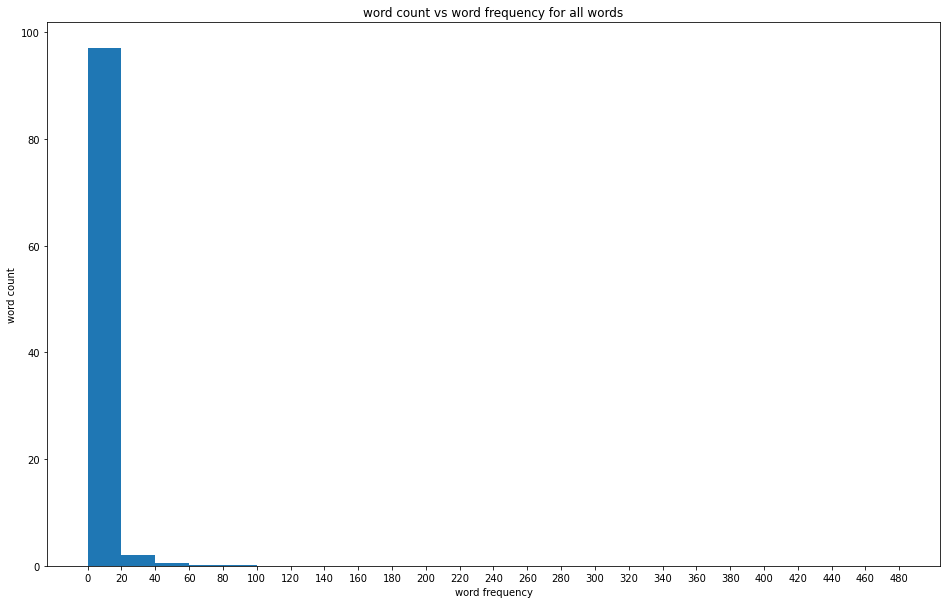

In [ ]:
figure = plt.figure(figsize=(16,10))
plt.hist(word_frequency.Frequency,weights = np.ones_like(word_frequency.Frequency)*100/len(word_frequency),bins = range(0,500,20))
plt.xticks(np.arange(0,500,20))
plt.title('word count vs word frequency for all words')
plt.xlabel('word frequency')
plt.ylabel('word count')

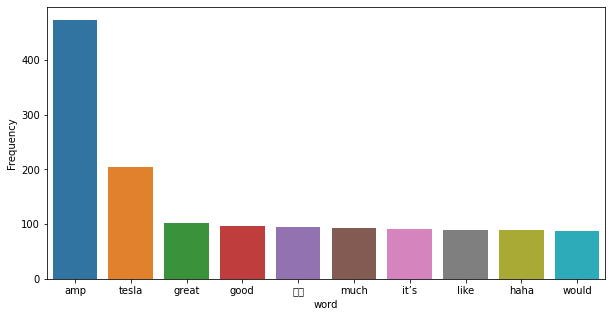

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='word',y='Frequency',data=Top10);

In [ ]:
from nltk import FreqDist
fd=FreqDist()

In [ ]:
corpus = df_2021.tweet_no_stop_word.str.split(expand=True).stack()
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

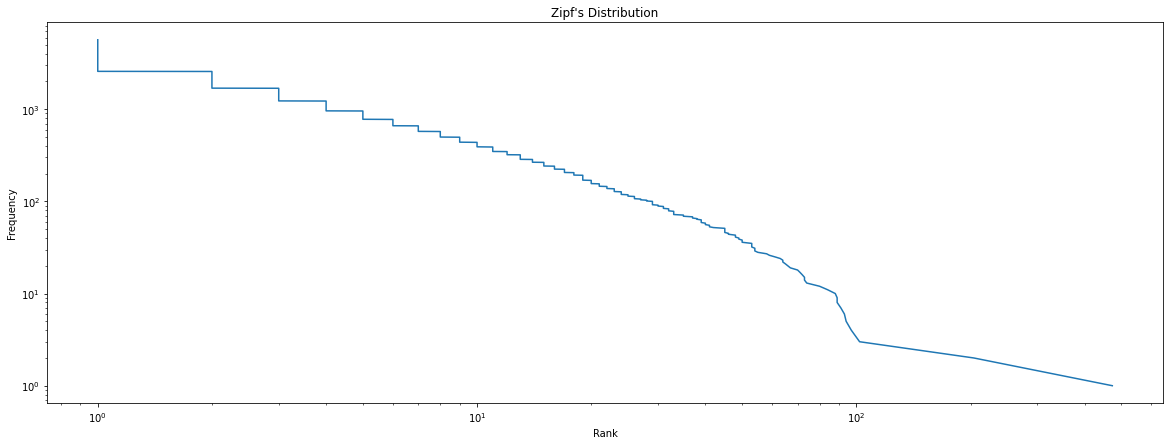

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
# text = [[word for word in line.split()] for line in df['tweet_no_stop_word']]
bigrams = list(nltk.bigrams(df_2021.tweet_no_stop_word.str.split(expand=True).stack()))
print (bigrams)

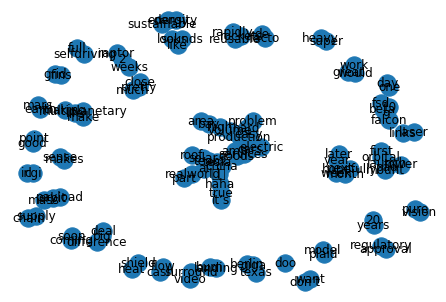

In [ ]:
import networkx as nx
bigram_df = pd.DataFrame(bigrams, columns = ['w1','w2'])
bigram_df['count'] = 1
bigram_df = bigram_df.groupby(['w1','w2'],as_index=False).sum()
bigram_df = bigram_df[bigram_df['count']>=5]
g = nx.from_pandas_edgelist(bigram_df,source = 'w1',target = 'w2')
nx.draw(g,with_labels = True)

#2022

In [ ]:
#For 2022

In [ ]:
df_2022 = pd.read_csv("2022.csv")
df_2022.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1500030191837589510,1499972826828259328,2022-03-05 12:47:21 Arabian Standard Time,2022-03-05,12:47:21,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",NaN,NaN,NaN,NaN
1,1500028396436340736,1499802655421448192,2022-03-05 12:40:13 Arabian Standard Time,2022-03-05,12:40:13,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",NaN,NaN,NaN,NaN
2,1500026380704178178,1499972826828259328,2022-03-05 12:32:12 Arabian Standard Time,2022-03-05,12:32:12,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",NaN,NaN,NaN,NaN
3,1500010328758923264,1499976967105433600,2022-03-05 11:28:25 Arabian Standard Time,2022-03-05,11:28:25,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'P...",NaN,NaN,NaN,NaN
4,1499982913949081600,1499976967105433600,2022-03-05 09:39:29 Arabian Standard Time,2022-03-05,09:39:29,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RogerYar', 'name': 'Дід Пана...",NaN,NaN,NaN,NaN


In [ ]:
df_2022['tweet'] = df_2022['tweet'].str.lower()
df_2022['tweet'] = df_2022['tweet'].str.replace('@\\w+','').str.replace('(f|ht)tp\\S+\\s*','').str.replace('[[:punct:]]','').str.strip(' \t\n\r')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df_2022['Stopwords'] = df_2022['tweet'].apply(lambda x:','.join([word for word in x.split() if word in stopwords]))
df_2022['tweet_no_stop_word'] = df_2022['tweet'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df_2022['tweet_no_stop_word'] = df_2021['tweet_no_stop_word'].apply(remove_punctuations)
df_2022.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Stopwords,tweet_no_stop_word
0,1500030191837589510,1499972826828259328,2022-03-05 12:47:21 Arabian Standard Time,2022-03-05,12:47:21,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",NaN,NaN,NaN,NaN,"in,a,this,is",🤣 7
1,1500028396436340736,1499802655421448192,2022-03-05 12:40:13 Arabian Standard Time,2022-03-05,12:40:13,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",NaN,NaN,NaN,NaN,"a,for",many ui improvements coming
2,1500026380704178178,1499972826828259328,2022-03-05 12:32:12 Arabian Standard Time,2022-03-05,12:32:12,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",NaN,NaN,NaN,NaN,"some,were,being,for,at,a,our,the,am,to",chart big deal
3,1500010328758923264,1499976967105433600,2022-03-05 11:28:25 Arabian Standard Time,2022-03-05,11:28:25,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'P...",NaN,NaN,NaN,NaN,,predicting macroeconomics challenging say leas...
4,1499982913949081600,1499976967105433600,2022-03-05 09:39:29 Arabian Standard Time,2022-03-05,09:39:29,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'RogerYar', 'name': 'Дід Пана...",NaN,NaN,NaN,NaN,"all,are,some,more,than",history guide many make past next recession


In [ ]:
word_frequency = df_2022.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
word_frequency

,word,Frequency
0,amp,122
1,tesla,70
2,🤣,52
3,like,35
4,good,35
...,...,...
2720,ships,1
2721,hotels,1
2722,connecting,1
2723,approved,1


In [ ]:
Top10 = df_2022.tweet_no_stop_word.str.split(expand=True).stack().value_counts().reset_index().head(10).rename(columns={'index':'word',
                                                                                                                   0:'Frequency'})
Top10

,word,Frequency
0,amp,122
1,tesla,70
2,🤣,52
3,like,35
4,good,35
5,great,33
6,beta,27
7,much,27
8,way,24
9,it’s,24


Text(0, 0.5, 'word count')

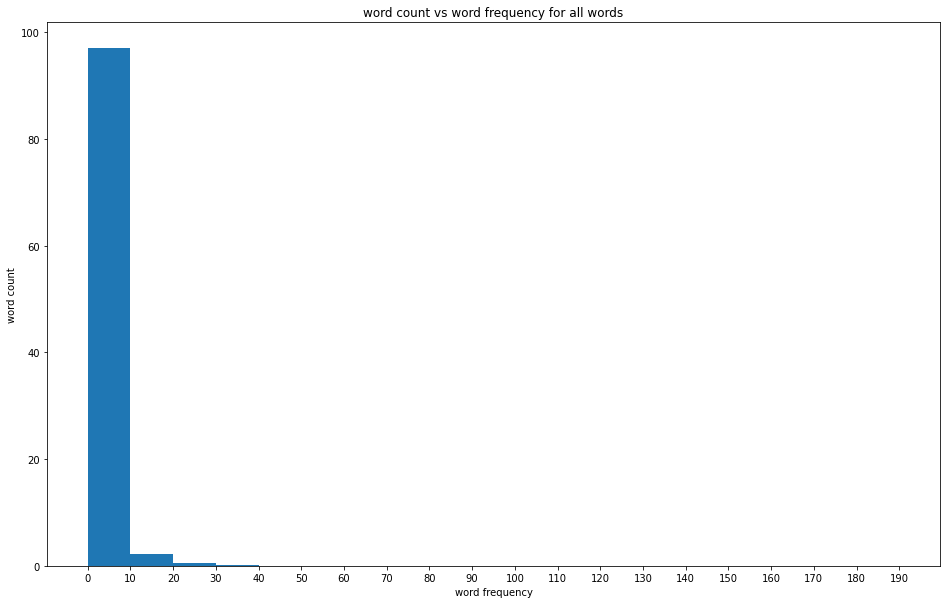

In [ ]:
figure = plt.figure(figsize=(16,10))
plt.hist(word_frequency.Frequency,weights = np.ones_like(word_frequency.Frequency)*100/len(word_frequency),bins = range(0,200,10))
plt.xticks(np.arange(0,200,10))
plt.title('word count vs word frequency for all words')
plt.xlabel('word frequency')
plt.ylabel('word count')

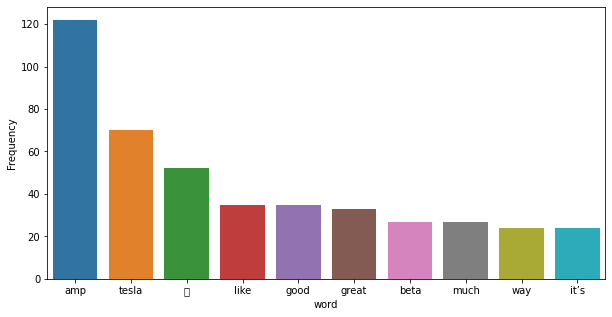

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='word',y='Frequency',data=Top10);

In [ ]:
from nltk import FreqDist
fd=FreqDist()

In [ ]:
corpus = df_2022.tweet_no_stop_word.str.split(expand=True).stack()
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

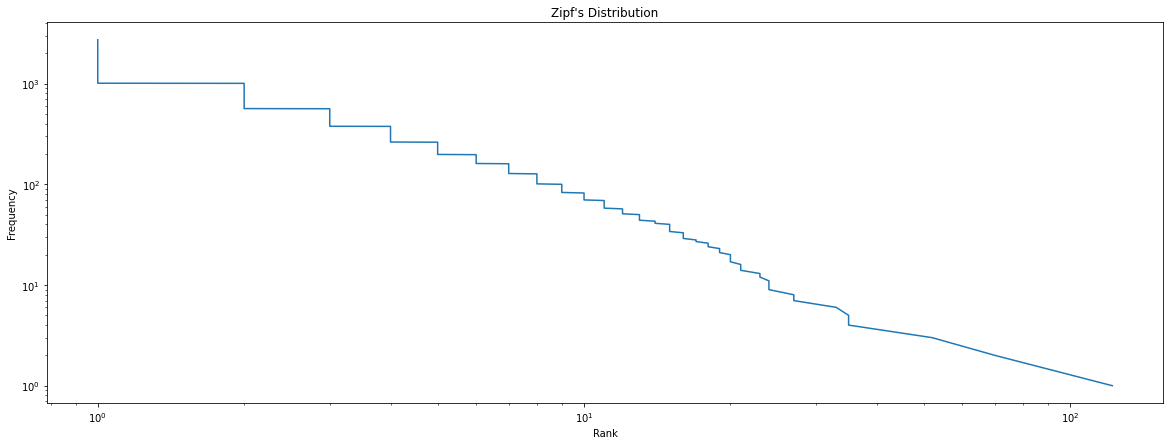

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

In [ ]:
from nltk import word_tokenize 
from nltk.util import ngrams

In [ ]:
# text = [[word for word in line.split()] for line in df['tweet_no_stop_word']]
bigrams = list(nltk.bigrams(df_2022.tweet_no_stop_word.str.split(expand=True).stack()))
print (bigrams)

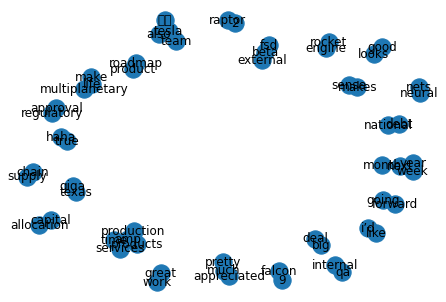

In [ ]:
import networkx as nx
bigram_df = pd.DataFrame(bigrams, columns = ['w1','w2'])
bigram_df['count'] = 1
bigram_df = bigram_df.groupby(['w1','w2'],as_index=False).sum()
bigram_df = bigram_df[bigram_df['count']>=3]
g = nx.from_pandas_edgelist(bigram_df,source = 'w1',target = 'w2')
nx.draw(g,with_labels = True)